<h1 style="text-align:center">COVID-19 Data Analysis & Visualization</h1>
<h3 style="text-align:center">Aryan Garg</h3>
<h4 style="text-align:center">B19153, Indian Institiute of Technology, Mandi</h4>
<h4 style="text-align:center"><a href="https://github.com/Aryan-Garg">Github</a> | <a href='b19153@students.iitmandi.ac.in'>E-Mail</a></h4>
<br>
<h4>Introduction:</h4>
<p> This document is solely made for educational purposes.<br><br>
    The <em>aim</em> of this document is to visualize COVID-19's statistics from 30th Jan to 8th June, mainly for India, to draw observations, inferences and answer some pressing questions relating to the pandemic.<br><br>
    Data visualization and it's analysis might give us some useful insights to create predictive models which might be of use to the general masses.<br>
</p>
<h4>Sources Used:</h4>
<ul>
    <li><a href="https://api.covid19india.org/csv/">API-Covid19-India</a></li>
    <li><a href="https://www.worldometers.info/coronavirus/#countries">Worldometers</a></li>
    <li><a href='https://censusindia.gov.in/Census_And_You/age_structure_and_marital_status.aspx'>Census of India</a></li>
<ul>

In [18]:
# Loading Dataset and essential python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

country_data = pd.read_csv("case_time_series.csv")
state_data = pd.read_csv("state_wise_daily.csv")
latest_cts = pd.read_csv("case_time_series (1).csv")

latest_cts.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [3]:
state_data.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


<h2>Timeline Analysis:</h2>

0      30-Jan
1      31-Jan
2      01-Feb
3      02-Feb
4      03-Feb
        ...  
126    04-Jun
127    05-Jun
128    06-Jun
129    07-Jun
130    08-Jun
Name: Date, Length: 131, dtype: object


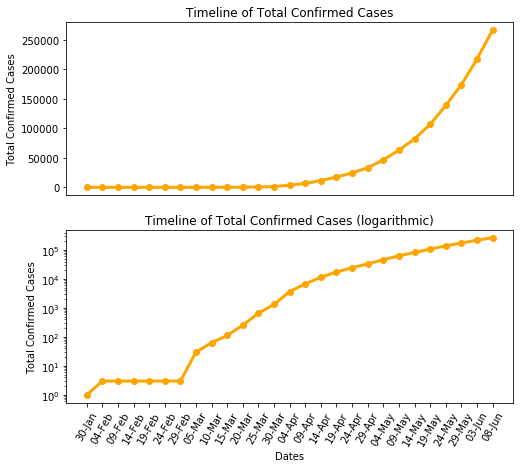

In [4]:
# Total cases (actual and logarithmic scale)
x1 = country_data['Date']
y1 = country_data['Total Confirmed']
#print(x1)


fig = plt.figure(figsize=(8,7))

plt.style.use('default')

# Actual -> subplot
plt.subplot(2,1,1) 
plt.title("Timeline of Total Confirmed Cases")

plt.ylabel("Total Confirmed Cases")

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,             
    labelbottom=False)

plt.plot(x1[::5], y1[::5], 'orange', marker ='o', lw = 3)

# Logarithmic -> Subplot
plt.subplot(2,1,2)
plt.title("Timeline of Total Confirmed Cases (logarithmic)")
plt.xlabel("Dates")
plt.ylabel("Total Confirmed Cases")

plt.yscale('log')
plt.xticks(rotation = 60)
plt.plot(x1[::5],y1[::5], 'orange', marker='o', lw = 3)

plt.subplots_adjust(hspace=0.2)

plt.show()

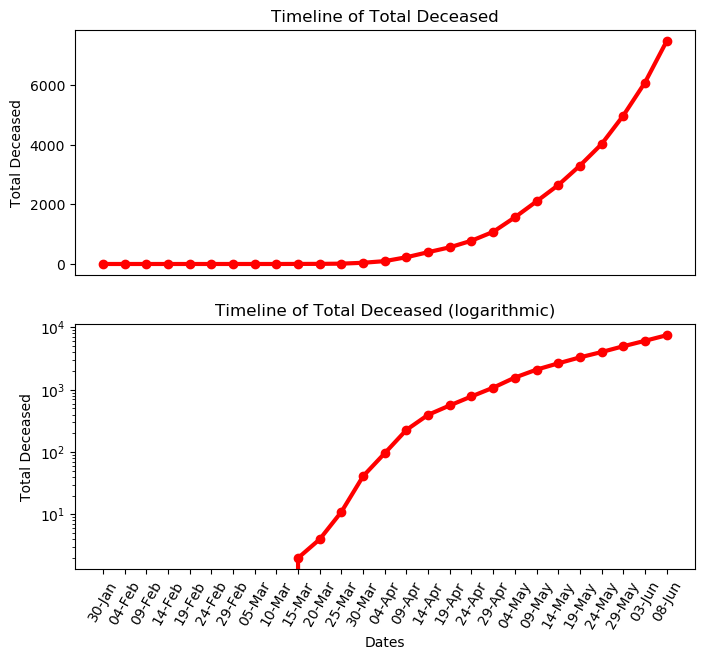

In [5]:
# Total deceased (actual and logarithmic scale)
y2 = country_data['Total Deceased']


fig = plt.figure(figsize=(8,7))

plt.style.use('default')

# Actual -> subplot
plt.subplot(2,1,1) 
plt.title("Timeline of Total Deceased")

plt.ylabel("Total Deceased")

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,             
    labelbottom=False)

plt.plot(x1[::5], y2[::5], 'red', marker ='o', lw = 3)

# Logarithmic -> Subplot
plt.subplot(2,1,2)
plt.title("Timeline of Total Deceased (logarithmic)")
plt.xlabel("Dates")
plt.ylabel("Total Deceased")

plt.yscale('log')
plt.xticks(rotation = 60)
plt.plot(x1[::5],y2[::5], 'red', marker='o', lw = 3)

plt.subplots_adjust(hspace=0.2)

plt.show()

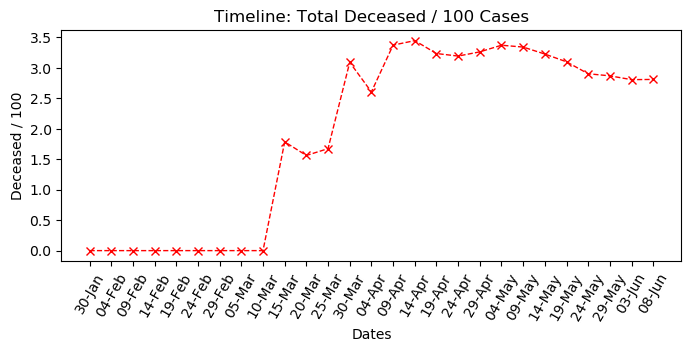

In [6]:
# Deaths per 100 confirmed cases
# y1 -> total confirmed cases
# y2 -> total deceased

deathsPerHundred = []

for i in range(len(y1)):
    thisDate = (y2[i]*100.0) / y1[i]
    deathsPerHundred.append(thisDate)
    
fig = plt.figure(figsize=(8,3))

plt.style.use('default')

plt.title("Timeline: Total Deceased / 100 Cases")

plt.ylabel("Deceased / 100")
plt.xlabel("Dates")

plt.xticks(rotation=60)

plt.plot(x1[::5], deathsPerHundred[::5], 'r--', marker ='x', lw = 1)


plt.show()



<strong>Inferences/Observations/Questions That Arise:</strong>
<p>
<ol>
<li>To say that the infection spread is slowing would be wrong by looking solely at this ( Deceased / 100 cases ) graph because total confirmed cases are rising exponentially, but slower than some other countries like Brazil, USA, China.</li>
<br>
<li>The rates for total deceased/100 have stabilized. Are people naturally developing immunity against the virus? Or people who are getting infected more than once are also included in the data who have some antibodies which are able to cope up with the virus? (A question for medical sciences)</li>
<br>
<li> The lockdown has certainly the rate of cases in India and hence the deceased per 100 rates have stabilized. (But this can't be totally true because of inefficient testing in India) <br></li>
<br>
<li> Could there be a huge spike again? Just like there was at 10th March, 25th March, 5th April because the lockdown is lifted again and maybe the virus has evolved due to the new asymptomatic cases? <br></li> 
<br>
    <li> <em>Hypothesis</em>: To say that India is coping up with the virus implies better recovery rates. So, let's analyse those stats next... <br></li>
</ol>     
</p>

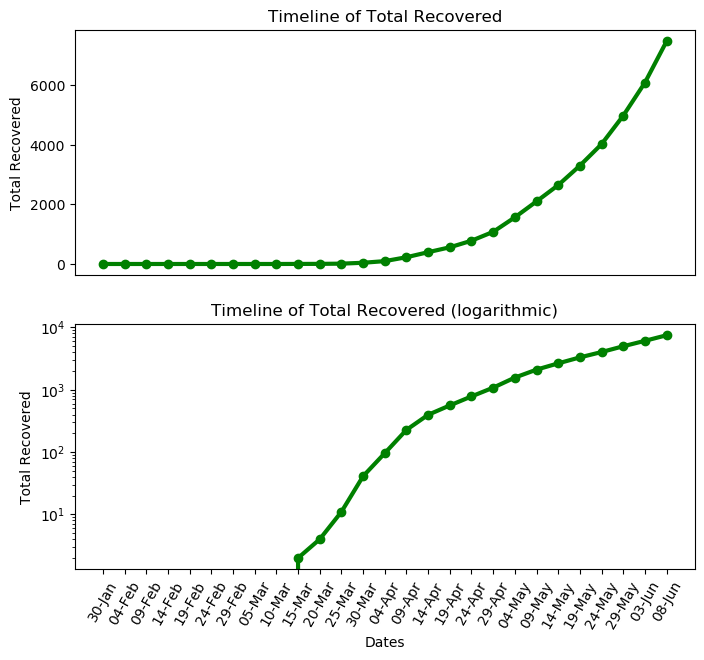

In [7]:
# Total Recovered (Actual and logarithmic)
y3 = country_data['Total Recovered']

fig = plt.figure(figsize=(8,7))

plt.style.use('default')

# Actual -> subplot
plt.subplot(2,1,1) 
plt.title("Timeline of Total Recovered")

plt.ylabel("Total Recovered")

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,             
    labelbottom=False)

plt.plot(x1[::5], y2[::5], 'green', marker ='o', lw = 3)

# Logarithmic -> Subplot
plt.subplot(2,1,2)
plt.title("Timeline of Total Recovered (logarithmic)")
plt.xlabel("Dates")
plt.ylabel("Total Recovered")

plt.yscale('log')
plt.xticks(rotation = 60)
plt.plot(x1[::5],y2[::5], 'green', marker='o', lw = 3)

plt.subplots_adjust(hspace=0.2)

plt.show()


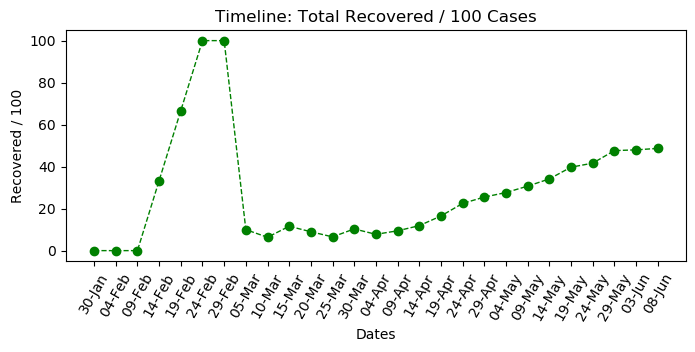

In [8]:
# Recovered per 100 confirmed cases
# y1 -> total confirmed cases
# y3 -> total recovered

recoveredPerHundred = []


for i in range(len(y1)):
    thisDate = (y3[i]*100.0) / y1[i]
    recoveredPerHundred.append(thisDate)
    
fig = plt.figure(figsize=(8,3))
plt.style.use('default')

plt.title("Timeline: Total Recovered / 100 Cases")
plt.ylabel("Recovered / 100")
plt.xlabel("Dates")
plt.xticks(rotation=60)

plt.plot(x1[::5], recoveredPerHundred[::5], 'g--', marker ='o', lw = 1)

plt.show()

<h3>So hypothesis (5) could possibly be true.</h3>
<p>To get a better understanding... Let's see all three together (confirmed, deaths, recovered)</p>

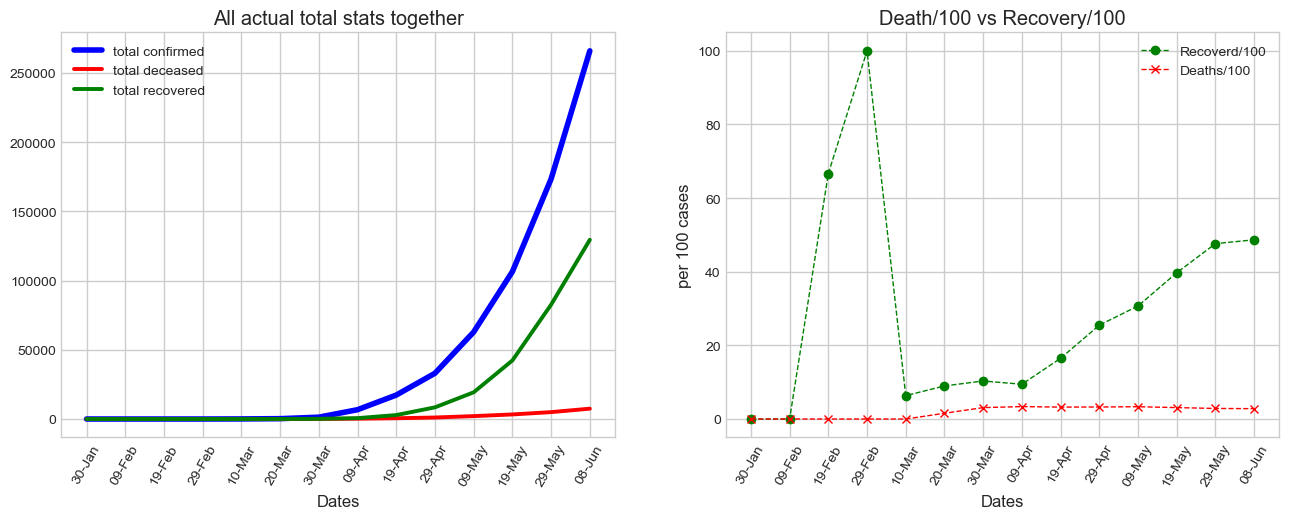

In [75]:
# Analyzing multiple stat together...
fig = plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
# Plotting total cases, total deceased, total recovered in one plot
plt.subplot(1,2,1)

plt.title("All actual total stats together")
plt.xlabel("Dates")
plt.xticks(rotation=60)
plt.plot(x1[::10],y1[::10],color='blue',label="total confirmed")
plt.plot(x1[::10],y2[::10],color='red',lw = 2.8,label="total deceased")
plt.plot(x1[::10],y3[::10],color='green',lw = 2.8,label="total recovered")
plt.legend()

# Plotting deaths/100 and recovered/100 together
plt.subplot(1,2,2)
plt.title("Death/100 vs Recovery/100")
plt.xlabel("Dates")
plt.ylabel("per 100 cases")
plt.xticks(rotation=60)
plt.plot(x1[::10], recoveredPerHundred[::10], 'g--', marker ='o', lw = 1, label="Recoverd/100")
plt.plot(x1[::10], deathsPerHundred[::10], 'r--', marker ='x', lw = 1, label="Deaths/100")
plt.legend()


plt.show()

<h3>Some of the observations drawn uptil now:</h3>
<p>
<ol>
    <li>India has not reached it's peak yet. It can still be categorized as a nation in stage 3.</li>
    <br>
    <li>Cases and deaths are rising and so is the recovery of patients. But this still doesn't prove our hypothesis that states that India is coping up with the virus which implies better recovery rates because the number of cases, which are rising quicker, may at a point, outweigh the effects of recovery rates and the death rate might start catching upto the recovery rate.</li>
    <br>
</ol>
<h4>Now let's compare India and Japan. If the hypothesis is correct, India must follow a similar path as Japan (Which has controlled the spread quite successfully).</h4>
</p>


149
94 94


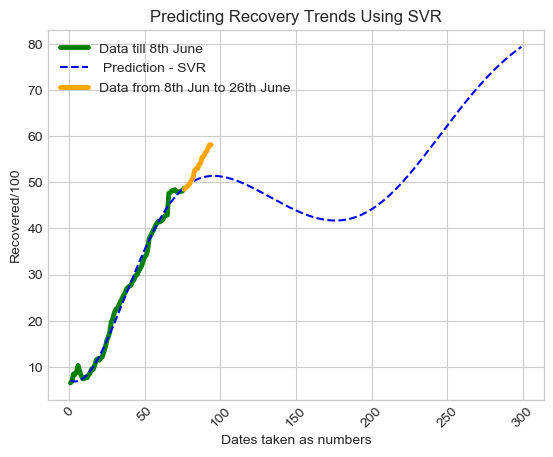

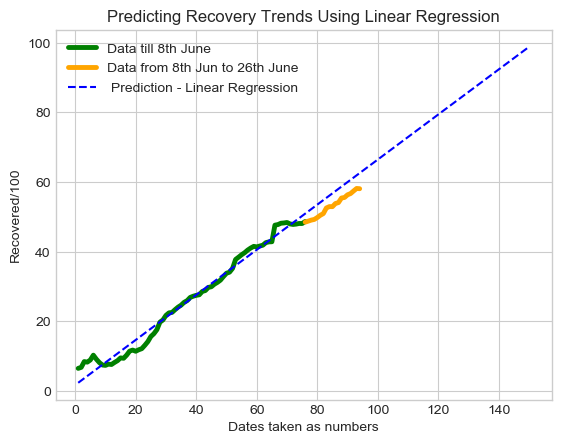

In [68]:
recoveredPerHundred2 = (latest_cts['Total Recovered'] * 100) / latest_cts['Total Confirmed']
print(len(recoveredPerHundred2))


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

xaxis_pts = np.arange(1,132-55)

xaxis_pts2 = np.arange(1,150-55)
yaxis_pts2 = np.array(recoveredPerHundred2[55:])

xaxis_pts = xaxis_pts.reshape(-1,1)
yaxis_pts = np.array(recoveredPerHundred[55:])


print(len(xaxis_pts2), len(yaxis_pts2))
new_dates = np.arange(1,300)
new_dates = new_dates.reshape(-1,1)


svr_rbf = SVR(kernel='rbf', C=40000, gamma=0.0001).fit(xaxis_pts, yaxis_pts)
reg = LinearRegression().fit(xaxis_pts, yaxis_pts)
y_pred = svr_rbf.predict(new_dates)

y_pred2 = reg.predict(new_dates)

till_here = []
till_here2 = []
for i in y_pred:
    if(i <= 100):
        till_here.append(i)
    else:
        till_here.append(100)
        
        
for i in y_pred2:
    if(i <= 100):
        till_here2.append(i)
    else:
        till_here2.append(100)



fig = plt.figure()

plt.title("Predicting Recovery Trends Using SVR")
plt.xlabel("Dates taken as numbers")
plt.ylabel("Recovered/100")

plt.xticks(rotation=45)


plt.plot(xaxis_pts, yaxis_pts, color='g',lw =3.5, label = "Data till 8th June")
plt.plot(new_dates, till_here,'b--', label = " Prediction - SVR")
plt.plot(xaxis_pts2[75:], yaxis_pts2[75:], 'orange', lw = 3.5,  label = "Data from 8th Jun to 26th June")

plt.legend()
plt.show()

fig2 = plt.figure()

plt.title("Predicting Recovery Trends Using Linear Regression")
plt.xlabel("Dates taken as numbers")
plt.ylabel("Recovered/100")
plt.plot(xaxis_pts, yaxis_pts, color='g',lw =3.5, label = "Data till 8th June")
plt.plot(xaxis_pts2[75:], yaxis_pts2[75:], 'orange', lw = 3.5,  label = "Data from 8th Jun to 26th June")
plt.plot(new_dates[:150], till_here2[:150],'b--', label = " Prediction - Linear Regression")

plt.legend()
plt.show()

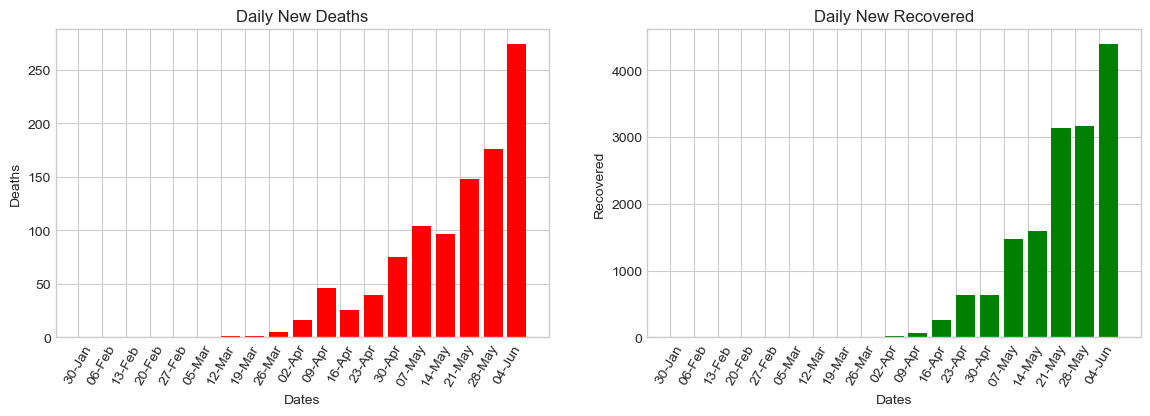

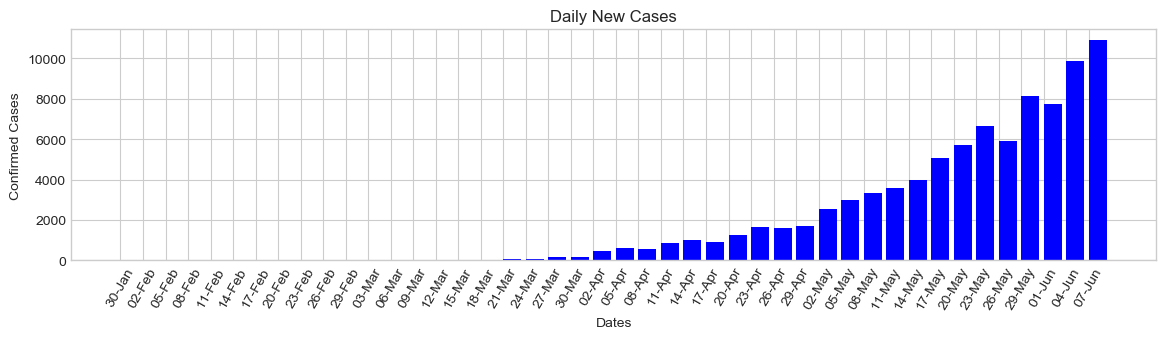

In [62]:
# Plotting (Bar charts) ***DAILY NEW*** cases, deaths and recovered cases
D_Confirmed = country_data['Daily Confirmed']
D_Deceased = country_data['Daily Deceased']
D_Recovered = country_data['Daily Recovered']

fig1 = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("Daily New Deaths")
plt.xlabel("Dates")
plt.ylabel("Deaths")

plt.xticks(rotation=60)

plt.bar(x1[::7],D_Deceased[::7],align='edge',color='red')

plt.subplot(1,2,2)
plt.title("Daily New Recovered")
plt.xlabel("Dates")
plt.ylabel("Recovered")

plt.xticks(rotation=60)

plt.bar(x1[::7],D_Recovered[::7],align='edge',color='green')

fig2 = plt.figure(figsize=(14,3))

plt.title("Daily New Cases")
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=60)
plt.bar(x1[::3],D_Confirmed[::3],color='blue',align='edge')

plt.show()



<h3>Some numbers that might give us a perspective...</h3>
<p>
1)  No. of people recovered per one(new) death
<br>
2)  No. of people recovered per new case
<br>
3)  No. of deaths per new case
<br><br>
See these values in the next cells
</p>

In [69]:
st1 = sum(D_Recovered) / sum(D_Deceased)
st2 = sum(D_Recovered) / sum(D_Confirmed)
st3 = sum(D_Deceased) / sum(D_Confirmed)

print("                 ***Averaged over",len(y1),"days of data***")
print("-----------------------------------------------------------------------")
print("Number of new recovered cases per one new death :  ",st1)
print("Number of new recovered cases per new case      :  ",st2)
print("Number of new deaths per new case               :  ",st3)
print("-----------------------------------------------------------------------")

                 ***Averaged over 131 days of data***
-----------------------------------------------------------------------
Number of new recovered cases per one new death :   17.318175738932727
Number of new recovered cases per new case      :   0.4867585641735051
Number of new deaths per new case               :   0.02810680359821217
-----------------------------------------------------------------------


<h2>Is this, on average, same across the whole nation?</h2>

Andaman and Nicobar Islands  ->  33
Andhra Pradesh  ->  4813
Arunachal Pradesh  ->  57
Assam  ->  2836
Bihar  ->  5247
Chandigarh  ->  320
Chhattisgarh  ->  1197
Dadra and Nagar Haveli  ->  22
Daman and Diu  ->  0
Delhi  ->  29943
Goa  ->  330
Gujarat  ->  20574
Haryana  ->  4854
Himachal Pradesh  ->  421
Jammu and Kashmir  ->  4285
Jharkhand  ->  1290
Karnataka  ->  5760
Kerala  ->  2006
Lakshadweep  ->  103
Ladakh  ->  0
Madhya Pradesh  ->  9638
Maharashtra  ->  88529
Manipur  ->  272
Meghalaya  ->  39
Mizoram  ->  42
Nagaland  ->  122
Odisha  ->  2994
Puducherry  ->  128
Punjab  ->  2663
Rajasthan  ->  10876
Sikkim  ->  7
Tamil Nadu  ->  33229
Telangana  ->  3742
Tripura  ->  840
Uttar Pradesh  ->  10947
Uttarakhand  ->  1411
West Bengal  ->  8613
Union Territories  ->  7837


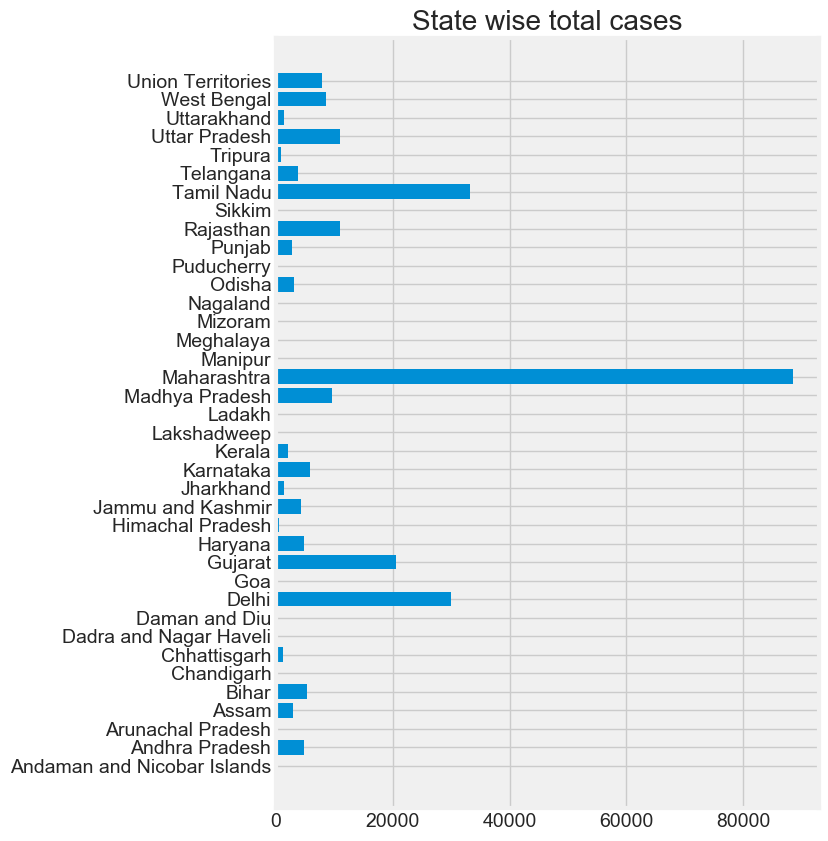

In [70]:
abbrs = []
for col in state_data.columns:
    if len(col)==2:
        abbrs.append(col)
abbrs.remove('TT')


fulls = ['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
         'Dadra and Nagar Haveli','Daman and Diu','Delhi','Goa','Gujarat','Haryana','Himachal Pradesh','Jammu and Kashmir',
         'Jharkhand','Karnataka','Kerala','Lakshadweep','Ladakh','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland',
         'Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand',
         'West Bengal','Union Territories'
        ]


total_cases_st_wise = []
total_rcvd_st_wise = []
total_dead_st_wise = []

for st in abbrs:
    total_cases_st_wise.append(sum(state_data[st][0::3]))
    total_rcvd_st_wise.append(sum(state_data[st][1::3]))
    total_dead_st_wise.append(sum(state_data[st][2::3]))

for i in range(len(fulls)):
    print(fulls[i]," -> ",total_cases_st_wise[i])

fig = plt.figure(figsize=(7,10))
plt.style.use('fivethirtyeight')
plt.title("State wise total cases")
plt.barh(fulls,total_cases_st_wise)

plt.show()


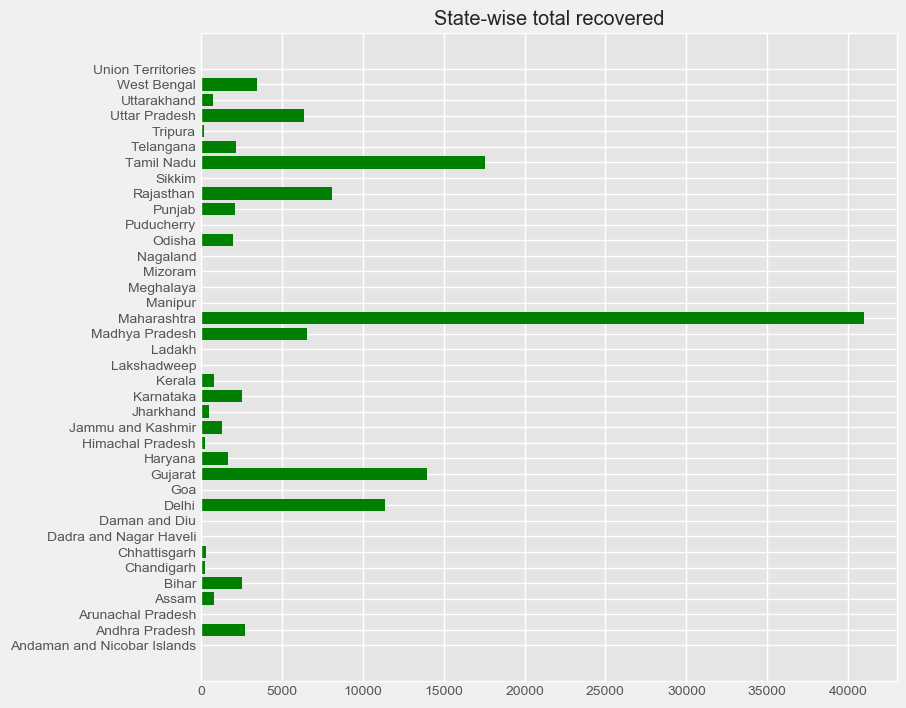

In [71]:
fig1 = plt.figure(figsize=(8,8))
plt.style.use('ggplot')
plt.title("State-wise total recovered")
plt.barh(fulls, total_rcvd_st_wise,color='green')
plt.show()

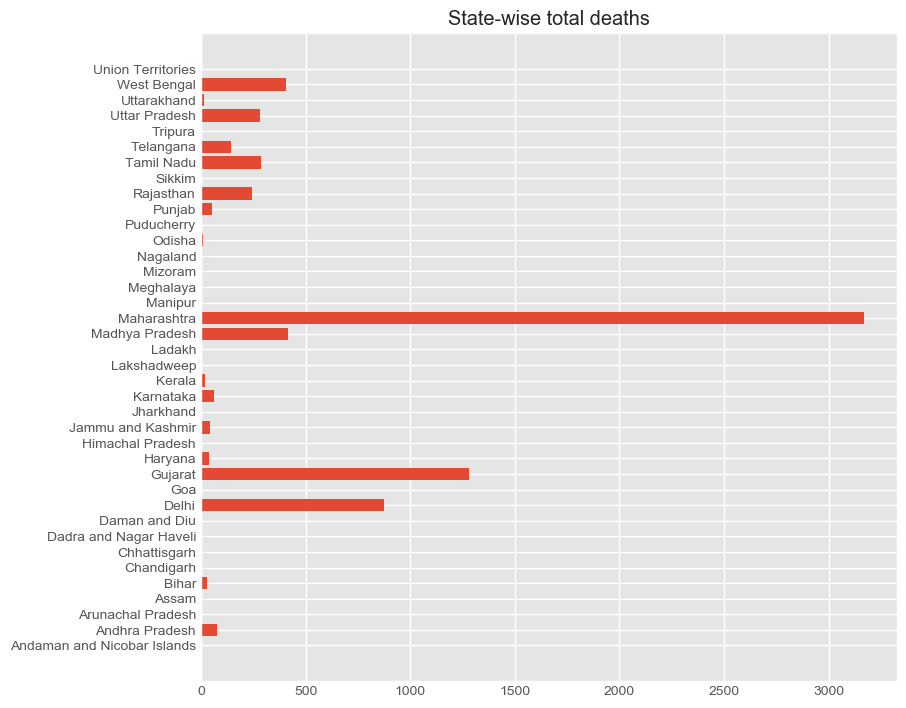

In [72]:
fig2 = plt.figure(figsize=(8,8))
plt.style.use('ggplot')
plt.title("State-wise total deaths")
plt.barh(fulls, total_dead_st_wise)
plt.show()

<h2>Some Highly Populated States of India - 2016 Data (decreasing order):</h2>
<p>
    <pre>
 States | Total Pop.(2019 data) |  Pct 0-14yrs |  Pct 15-59yrs |  Pct >60yrs |
    <ol>
        <li>Uttar Pradesh  : 237,882,725 |    30.2%    |    62.8%   |   7.0%   |</li>
        <li>Bihar          : 124,799,926 |    35.0%    |    58.4%   |   6.6%   |</li>
        <li>Maharashtra    : 123,144,223 |    25.1%    |    65.6%   |   9.3%   |</li>
        <li>West Bengal    : 99,609,303  |    23.7%    |    67.4%   |   9.0%   |</li>
        <li>Madhya Pradesh : 85,358,965  |    30.1%    |    62.7%   |   7.2%   |</li>
        <li>Rajasthan      : 81,032,689  |    30.1%    |    62.4%   |   7.5%   |</li>
        <li>Tamil Nadu     : 77,841,267  |    21.6%    |    67.9%   |   10.5%  |</li>
        <li>Karnataka      : 67,562,686  |    24.3%    |    67.4%   |   8.3%   |</li>
        <li>Gujarat        : 63,872,399  |    26.1%    |    65.3%   |   8.6%   |</li>
        <li>Delhi          : 18,710,922  |    25.0%    |    68.1%   |   6.9%   |</li>
    </ol>
    </pre>
</p>
<p>
    Assuming one in five hundred gets infected.
    
    Q. Why this assmption? 
    A. Pop of india in (populated states) / Total cases in India
    
    It is quite evident that Pct[(0-14yrs) + (>60yrs)]*population_of that_state/500 = total cases in that state
    Implication >> children and elderly are at a higher risk...
</p>
<h3>Let's prove it by this data and code -> Case Study: Maharashtra</h3>

In [73]:
pop_maha = 123144223
pct_children_maha = 25.1
pct_elders_maha = 9.3

LHS = ((pct_children_maha+pct_elders_maha)/100) * pop_maha / 500
RHS = total_cases_st_wise[-17]

print("Our assumption and calculation ->",LHS)
print('Real data available to us      ->',RHS)
print("This somewhat proves our implied statement. The data is bound to vary to a greater extent... We just got lucky :)")

Our assumption and calculation -> 84723.22542400002
Real data available to us      -> 88529
This somewhat proves our implied statement. The data is bound to vary to a greater extent... We just got lucky :)


<pre>
----------------------------------------------------------------------------------------------------------------------
This implies that there might be a relation between infection/death rates and the age of a person!
<strong>Age-wise Analysis (Death share of each age-group in India)</strong>
----------------------------------------------------------------------------------------------------------------------
</pre>

<h3>Till 8th June (1 in 500)</h3>
<pre>
Uttar Pradesh          -> 1,76,984.7474‬

Bihar                  -> 1,03,833.538432

West Bengal            -> 65,144.484162‬

Madhya Pradesh         -> 63,677.78789‬

Rajasthan              -> 61,260.712884

Tamil Nadu             -> 49,974.093414‬

Karnataka              -> 44,050.871272‬

Gujarat                -> 44,327.444906‬

Delhi                  -> 11,937.568236‬
</pre>

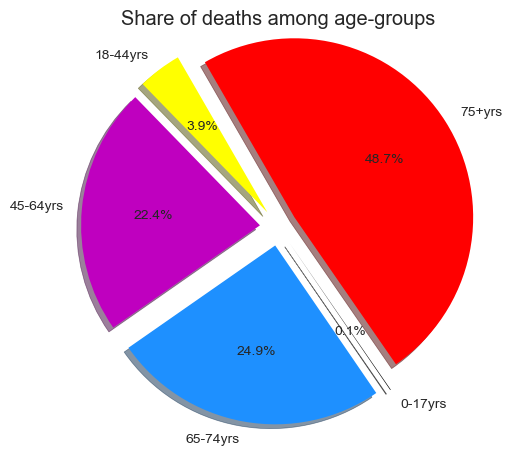

In [74]:
# Source: worldometers (India)
age_grps = ['18-44yrs','45-64yrs','65-74yrs','0-17yrs','75+yrs'] # in years
age_grps_deceased = [601, 3413, 3788, 9, 7419]
exp_tp = (0.12,0.12,0.12,0.12,0.12)
fig_pie = plt.figure()
plt.title("Share of deaths among age-groups")
plt.pie(age_grps_deceased,labels=age_grps,autopct='%1.1f%%',explode=exp_tp, shadow=True, startangle=120,radius=1.15,
        colors=['yellow','m','dodgerblue','black','r'])
plt.show()

<pre>
Conclusion:

1) Elderly are at the highest risk. And due to the joint family structures in India (contact structure in India),it 
might be difficult to contain the spread. (Please take good care of your elderly in your family if you're reading this)

</pre>

<br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<p style="text-align:center"><em>We have analysed COVID-19 to quite an extent. But how does it compare with other epidemics?</em></p>
<h2 style="text-align:center"> CASE STUDY: H1N1 vs. COVID-19</h2>
<br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<p>
    We will look at:
    <pre><ol>
        <li> Total cases for each virus
        <li> Total deaths for each virus
        <li> Mortality rate percentages
        <li> RO - Reproduction Number (No. of people infected from one infected individual)
    </ol>
    And compare which one was the deadlier epidemic by measuring mortality rates and 
    giving logical estimates of growth in medical sciences and technology. 
    </pre>
</p>

In [ ]:
# source: worldometer (link at the beginning)
corona_cases = 7235413
corona_deaths = 409508
corona_mortality = 1.38
corona_ro = 2.3

# source: CDC --- taking worst case of highest no. of infected and dead
h1n1_cases = 1.4 * 1000000000 # 1.4 billion
h1n1_deaths = 575400
h1n1_mortality = 0.02
h1n1_ro = 1.5

fig = plt.figure(figsize=(12,7))
plt.style.use('default')
plt.subplot(2,2,1)
plt.title("Total cases")
plt.bar(['COVID-19','H1N1'],[corona_cases, h1n1_cases],color='deepskyblue')

plt.subplot(2,2,2)
plt.title("Total Deaths")
plt.bar(['COVID-19','H1N1'],[corona_deaths, h1n1_deaths],color='indianred')

plt.subplot(2,2,3)
plt.title("Mortality rate percentage")
plt.bar(["COVID-19",'H1N1'], [corona_mortality, h1n1_mortality], color='seagreen')

plt.subplot(2,2,4)
plt.title("RO number")
plt.bar(["COVID-19",'H1N1'], [corona_ro, h1n1_ro], color='gold')
plt.show()

<strong>Conclusion:</strong>
Clearly COVID-19 seems to be more deadly considering the mortality rates, RO number and just compare how many have sadly left us (may God rest their souls, Amen) with so few being infected as compared to H1N1.
And considering the fact we were fairly early to detect that coronavirus was spreading... It is clearly the deadlier virus.

<em>Any suggestions or improvements are welcome. If you discover any error, please contact me about the same.</em>

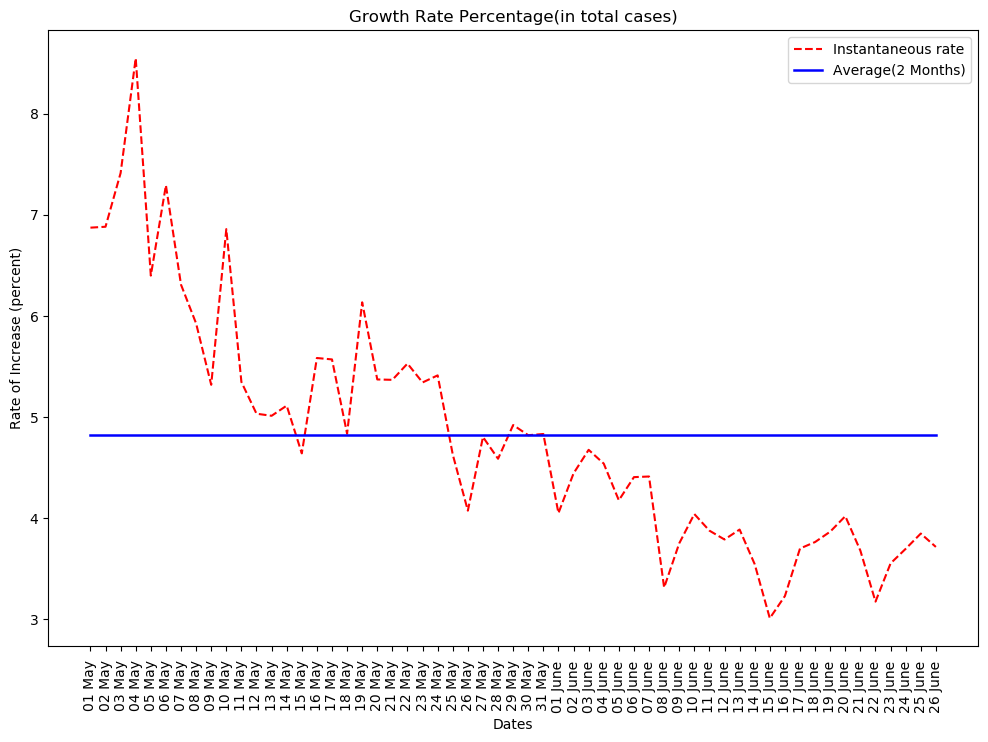

Average Growth rate(over complete dataset): 11.137785272054499 %
Average Growth rate(from 1st May): 4.82403165194058 %


In [127]:
growth_rate_pcts = []
for i in range(1, len(latest_cts['Total Confirmed'])): 
    growth_rate_pcts.append(((latest_cts['Total Confirmed'][i] - latest_cts['Total Confirmed'][i-1])*100)
                            /(latest_cts['Total Confirmed'][i-1]))       

xaxis = latest_cts['Date']

figlol = plt.figure(figsize=(12,8))
plt.style.use('default')
plt.title("Growth Rate Percentage(in total cases)")
plt.xlabel("Dates")
plt.ylabel("Rate of Increase (percent)")
plt.xticks(rotation = 90)

plt.plot(xaxis[92:], growth_rate_pcts[91:], 'r--', label = "Instantaneous rate")
plt.plot(xaxis[92:], [4.82403165194058 for x in range(149-92)], lw = 1.8, color = 'blue', label = "Average(2 Months)")
plt.legend()
plt.show()

print("Average Growth rate(over complete dataset):",sum(growth_rate_pcts)/len(growth_rate_pcts),"%")
print("Average Growth rate(from 1st May):",sum(growth_rate_pcts[91:])/len(growth_rate_pcts[91:]),"%")

ValueError: x and y must have same first dimension, but have shapes (99, 1) and (85,)

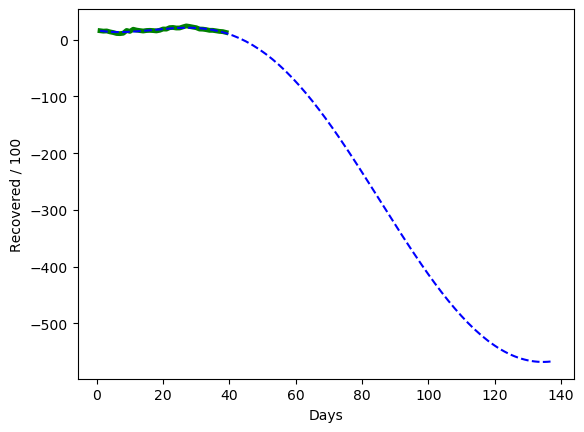

In [196]:
'''
Running the SVR model, with the same hyperparameters, on 30% of Japan's data to verify our prediction to an extent.

Start Date : 26th February
End Date   : 
'''
from sklearn.svm import SVR
japan = pd.read_csv("japan.csv")


days = np.arange(1,40)
days = days.reshape(-1,1)
recPh = np.array(japan["Recovered"][4:] * 100 / japan["Confirmed"][4:])
y_train = recPh[:39]


days_pred = np.arange(1,138).reshape(-1,1)

svr_rbf = SVR(kernel='rbf', C=400000, gamma=0.0001).fit(days, y_train)
y_pred = svr_rbf.predict(days_pred)


        

fig = plt.figure()

plt.xlabel("Days")
plt.ylabel("Recovered / 100")

plt.plot(days, y_train, color = 'green', lw = 3.5, label = "Recovered Per 100 Cases (30% data)")
plt.plot(days_pred, y_pred, 'b--', label = "Prediction - SVR (30% data)")

plt.plot(days_pred[38:], recPh[38:], lw = 3.5, color = 'orange', label = "Actual Curve (100% data)")
plt.xticks(rotation = 60)
plt.legend()
plt.show()

ICU Req: [9.02233893] % of the total confirmed cases


C:\Users\HP\Anaconda3\envs\mlcc\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


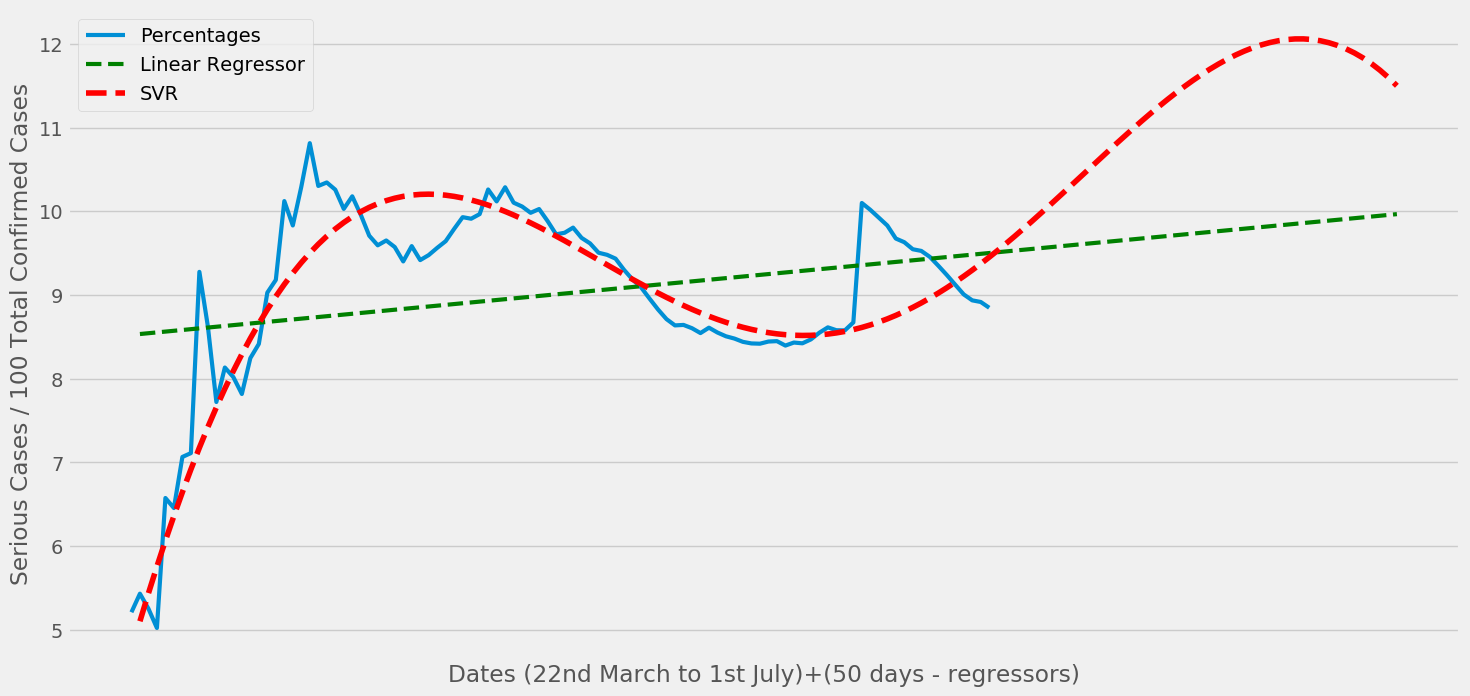

In [296]:
dt = pd.read_csv("case_time_series.csv")
# 22nd March Onwards calculated

'''
Serious Cases(that needed an ICU) are calculated using the Deceased on a particular day assuming that 
the person had to be put in intensive care on the very day of their demise. Obviously, this will not be true.

The ICNARC report(world report) suggests the median (commonest) duration of an ICU admission in patients with COVID-19 infections 
who survive is 4 days, but a quarter stay 8 or more days.
Medical experts claim that patients who couldn't recover had to stay upto 2 weeks and sometimes even more.
Also, on an average, two-thirds of the ICU admitted patients survived. 


The Union health ministry of India claimed a while ago that on average 4.16% of the total cases 
were serious in the country at a time. No data had been published regarding the claim but reports suggested the figures:
2.25 per cent were admitted to the ICU and 1.91 per cent needed oxygen support. 

Using the figures provided by ICNARC and India:

=> (Total Cases on that day) * 0.0225 = 3 * (Total Deceased on that day) = People who were put in ICUs on that day

The fraction of those who survive in ICUs won't change very drastically for the next few months but would surely 
be on a slow and steady rise if the hypothesis is correct. 
'''

seriousCasesPctList = np.array((dt["Total Deceased"][52:] * 300.0 / dt["Total Confirmed"][52:])).reshape(-1,1)        

seriousCasesPct = sum(seriousCasesPctList) / len(seriousCasesPctList)

print("ICU Req:",seriousCasesPct,"% of the total confirmed cases")

from sklearn.linear_model import LinearRegression

date = dt["Date"][52:]
date_train = np.arange(1,103).reshape(-1,1)
days_pred = np.arange(1,150).reshape(-1,1)

svr_rbf_1 = SVR(kernel='rbf', C=40000, gamma=0.00005).fit(date_train, seriousCasesPctList)
reg = LinearRegression().fit(date_train, seriousCasesPctList)

y_pred = reg.predict(days_pred)
y_pred_1 = svr_rbf_1.predict(days_pred)


fig1 = plt.figure(figsize=(16,8))

plt.style.use('fivethirtyeight')
plt.xlabel("Dates (22nd March to 1st July)+(50 days - regressors)")
plt.ylabel("Serious Cases / 100 Total Confirmed Cases")
plt.xticks([])

plt.plot(date, seriousCasesPctList, lw = 3, label = "Percentages")
plt.plot(days_pred, y_pred, 'g--', lw = 3, label = "Linear Regressor")
plt.plot(days_pred, y_pred_1, 'r--', label = "SVR")
plt.legend()
plt.show()
#print("The Linear Regression predicts that after 50 days serious cases will drop to 2.5% of the confirmed cases on that day")
print()

<pre><p>
If our hypothesis is correct, then the SVR which predicted approx 90-95% recovery rates in 10 months, would also give 
us a good estimate of total cases and the peak till the numbers stabilize.</p>
<p>
If India can keep up the production or just manage to stay ahead of the rising number of serious cases that require serious medical attention (which requires patients to be kept in ICUs or on ventilator like equipment) till we reach the peak, then the nation will be on it's way to recovery or else it might be on it's way to disaster, thus failing our 
proposed hypothesis. If our hypothesis fails, we intend to dive into India's economy and try to optimize it's expenditure in other sectors(such as military and defence, education, food, transportation) so that we can maximise the medical 
and health sector share to sustain the pandemic. (The paper in no way tries to demeans Indian government's decision if it embarks on a path of analysing the countries economic policies and their effect on the current situation and assumes the decision taken by it in the best interest of the general masses).
</p><h3><p>
So, our aim is to find the peak of total cases next</p></h3>
</pre>

C:\Users\HP\Anaconda3\envs\mlcc\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


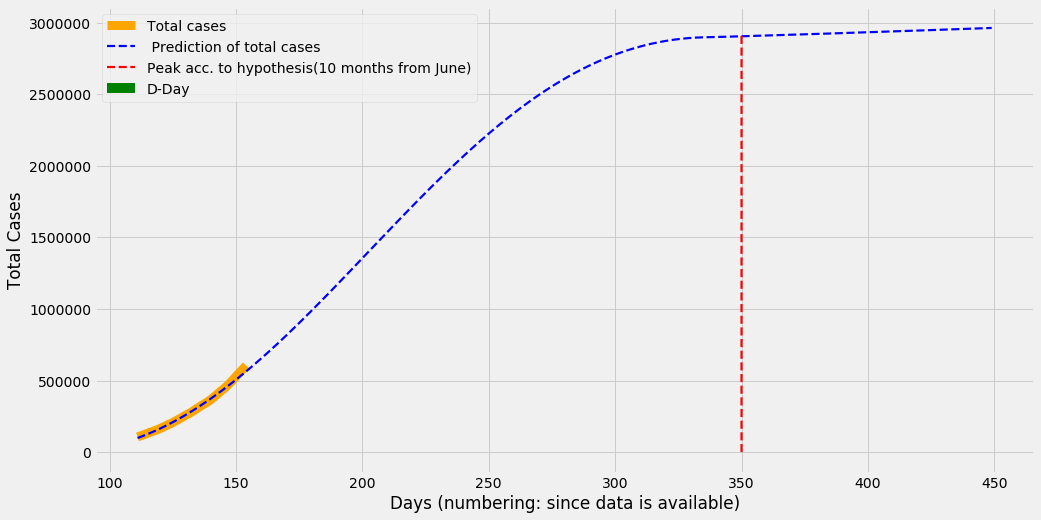

In [112]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = pd.read_csv("case_time_series.csv")
dates = f["Date"]
ytrain = f["Total Confirmed"]
xtrain = np.arange(1,len(dates)+1).reshape(-1,1)

xtest = np.arange(1,450).reshape(-1,1)
svr = SVR(kernel='rbf', C=10000000, gamma=0.000025).fit(xtrain[110:], ytrain[110:])
ytest = svr.predict(xtest[110:])

for i in range(1,len(ytest)):
    if(ytest[i] < ytest[i-1]):
        ytest[i] = ytest[i-1] + i + 300
        
x = np.zeros(3000000)
x += 350
y = []
for i in range(len(x)):
    if i <= 2912416.0593311014:
        y.append(i)
    else:
        y.append(2912416.0593311014)

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15,8))

plt.plot(xtrain[110:], ytrain[110:],lw = 9, color = 'orange', label = "Total cases")
plt.plot(xtest[110:], ytest, 'b--', label = " Prediction of total cases", lw = 2.2)

plt.plot(x,y,'r--', lw = 2.2, label = "Peak acc. to hypothesis(10 months from June)")
plt.xlabel("Days (numbering: since data is available)")
plt.ylabel("Total Cases")
plt.legend()

plt.show()

In [132]:
import math
peakCases = ytest[250]
print("**** Peak occurs around 200 days, i.e., approx. 6 months => mid-January ****")
print("Peak cases:",peakCases)
# Serious cases on the Peak Day: (Total Cases on the day) * 0.0225
print("Serious cases on Peak Day:",peakCases*0.0225)
'''
Assuming survivors get discharged in 4 days and the unfortunate ones in 14 days
2/3rd of serious cases are survivors) => (2/3)*4 + (1/3)*14 = 7.33 days --> 8 days (approx)

Implies Total ICUs that would be in use on peak day would be the sum of serious cases from 8 days before till Peak Day

We are assuming that a person admitted on day 1 will still be in an ICU bed on day 8. 
And will be relieved on the start of day 9.
'''
TSC_DDay = sum(ytest[243:251]*0.0225)
print("Total Serious Cases in ICUs on peak day:", TSC_DDay)


# for ICUs with ventilators, including PPE costs from Rs. 44,000 to 54,000
# Current number of ICU Beds available : 
# Hospitals in India                   : 

# We define 'Specialist Doctors' as those doctors that take care of patients in these ICUs :
# Number of patients per specialist doctor (current)  :
# Number of patients per specialist doctor (peak day) :
# Number of specialist doctors added to the workforce :

# Fun Fact : China made hospitals in 10 days

**** Peak occurs around 200 days, i.e., approx. 6 months => mid-January ****
Peak cases: 2912416.0593311014
Serious cases on Peak Day: 65529.361334949775
Total Serious Cases in ICUs on peak day: 523889.6506795982


<h2>Looking at India's medical and health sector</h2>

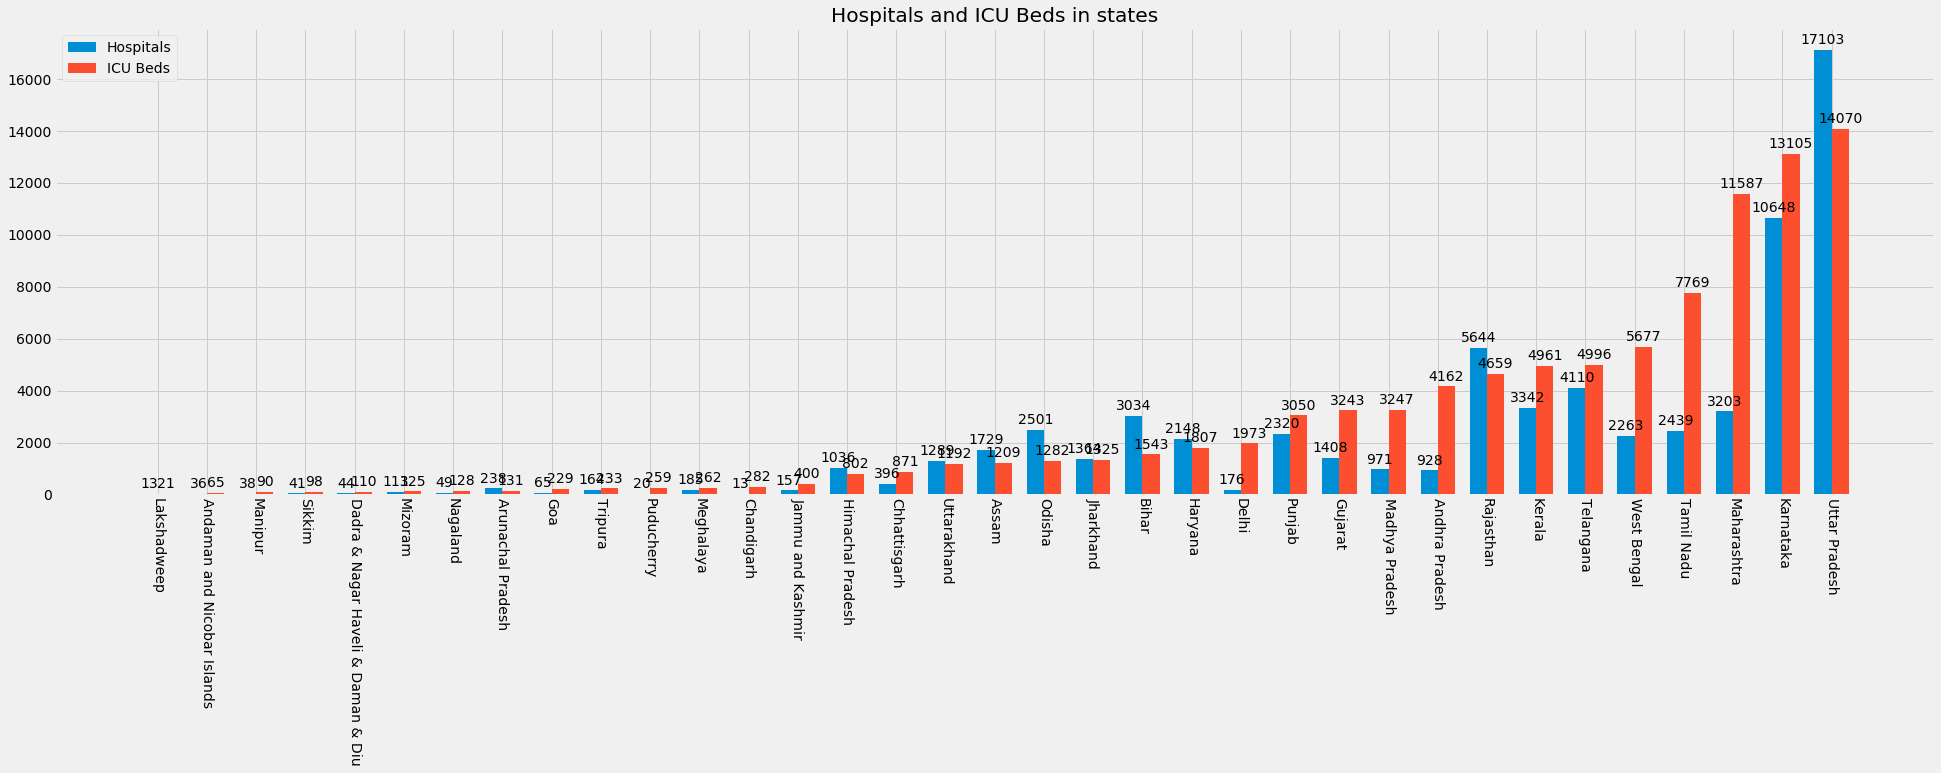


Total Hospitals : 69228
Total ICU Beds  : 94963



In [169]:
# Data taken from CCDP (A Princeton study which estimates the total number of hospitals and equipment)
hos = pd.read_csv("Hos_ICU_vent_state.csv")
state = hos["States"]
totHos = hos["Total Hospitals"]
ICU_beds = hos["ICU_Beds"]


dic1 = {}

for i in range(len(state)):
    dic1[state[i]] = [totHos[i],ICU_beds[i]]
    
dic1 = sorted(dic1.items(), key = lambda x: x[1][1])

xpts = []
ypts = []
y2pts = []
for i in dic1:
    xpts.append(i[0])
    ypts.append(i[1][0])
    y2pts.append(i[1][1])
    
x = np.arange(len(xpts))

width = 0.35
fig, ax = plt.subplots(figsize=(30,8))
rects1 = ax.bar(x - width/2, ypts, width, label='Hospitals')
rects2 = ax.bar(x + width/2, y2pts, width, label='ICU Beds')

ax.set_title('Hospitals and ICU Beds in states')
ax.set_xticks(x)
ax.set_xticklabels(xpts)

plt.xticks(rotation=-90)

ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.show()

print(
'''
Total Hospitals : 69228
Total ICU Beds  : 94963
'''
)


<h3>Cost of setting up an ICU (10 Beds) (minimal but neccessary equipment) in Rupees</h3>
<pre>
<ul>
    <li> Unmotorized Bed                       : 50,000/piece   => 500,000
    <li> Patient Monitors                      : 200,000/piece  => 2,000,000 
    <li> Ventilators                           : 800,000/piece  => 8,000,000
    <li> Infusion & Syringe Pumps(at least 18) : 40,000/piece   => 720,000
    <li> Central Monitoring Station            : 100,000
    <li> Oxygen/Compressed Air Pipeline        : 200,000 (if already available in hospital, else 600,000)
    <li> ABG Machine                           : 600,000
    <li> BP Apparatus, ECG Machine, etc.       : 500,000
    <li> Air Mattress (Indian made)            : 3000/bed        => 30,000
    <li> Defibrillator                         : 300,000
    <li> Medical Grade Flooring would cost about Rs. 100/sq. ft. minimum and would cost Rs. 300,000
    <li> Air Conditioning with sufficient fresh air exchange would cost about Rs. 750,000 for about 25 tonnes of AC
</ul>
<strong>
NOTE: This is considering 0 civil work and considering that the hospital is otherwise well equipped and has a proper Laboratory, Radiology, Pharmacy and OT.
</strong>
</pre>

<h3>Cost of setting up an ICU (in a fully operational hospital) which has 10 beds: Rs. 1,40,00,000 (1.4 crores or 14 million)</h3>
<br>
<p> 
    Required Number of Beds = 523889 - 94963 = <strong>428,926</strong><br>
Cost of setting these ICU beds in already built and operational hospitals = 428926 * 1.4 / 10 crores = <strong>60,049.64‬ crores or (600496.4 million)</strong>
</p>

Cost of setting these ICU beds in already built and operational hospitals is 60,049.64‬ crores or (600496.4 million which happens to be about 0.35 \% of India's GDP

In [ ]:
44,96,694